# Seaborn Basics


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


The goal of this exercise is to analyze a restaurant invoices and tips

In [32]:
df = sns.load_dataset('tips')

df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order
- Don't use rainbow colors

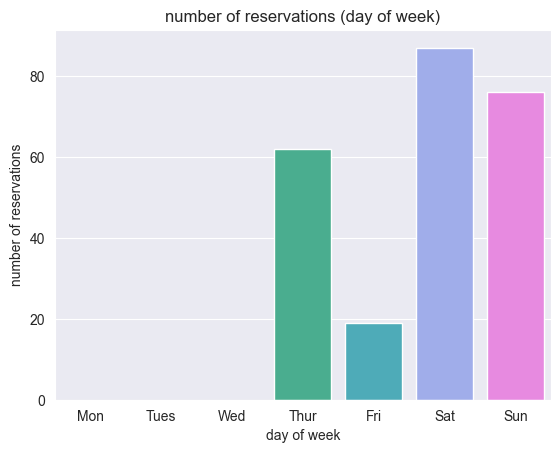

In [33]:
week_order = ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"]

sns.set_style("darkgrid")
sns.set_palette("rocket")
sns.countplot(data=df, x='day', order=week_order)

plt.xlabel("day of week")
plt.ylabel("number of reservations")
plt.title("number of reservations (day of week)")

plt.show()


In [34]:
df.head(20)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

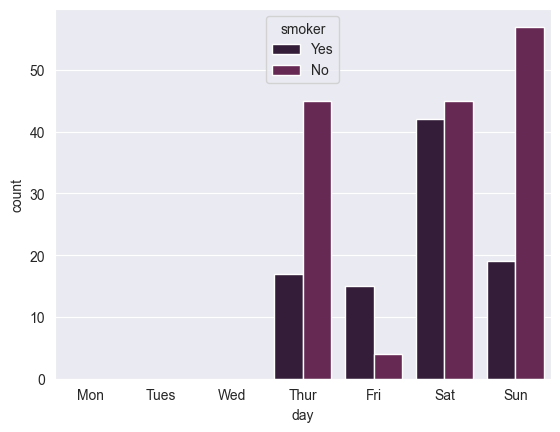

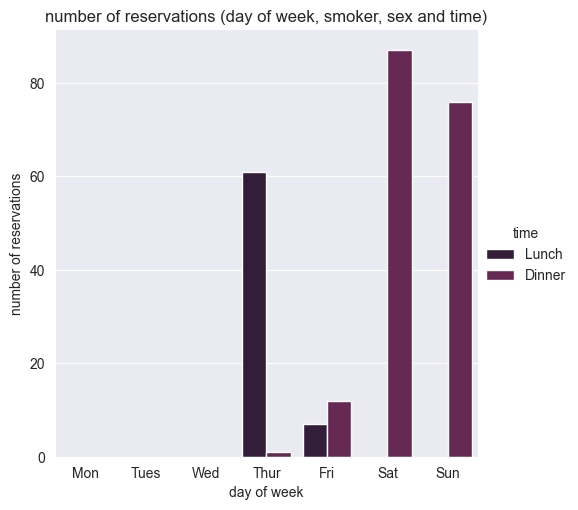

In [35]:
week_order = ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"]

sns.set_style("darkgrid")
sns.set_palette("rocket")
sns.countplot(data=df, x='day', hue='smoker', order=week_order)

g = sns.catplot(data=df, x='day', hue='time', kind='count', order=week_order)

plt.xlabel("day of week")
plt.ylabel("number of reservations")
plt.title("number of reservations (day of week, smoker, sex and time)")

plt.show()


## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

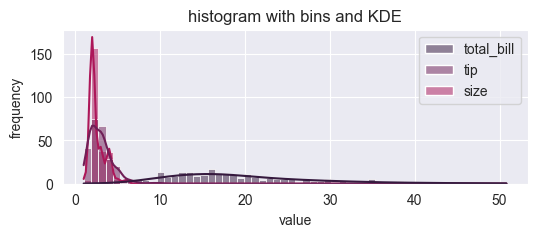

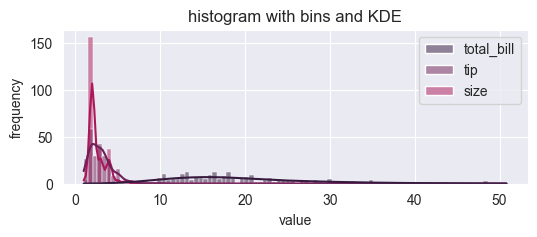

In [36]:
bins = [58, 92]
sns.set_style("darkgrid")
sns.set_palette("rocket")

for num_bins in bins:
    plt.figure(figsize=(6, 2))
    sns.histplot(data=df, bins=num_bins, kde=True)
    plt.title(f'histogram with bins and KDE')
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.show()


### 2.1 Multiples distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

<img src="https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/boxplot_example.png" width=350>

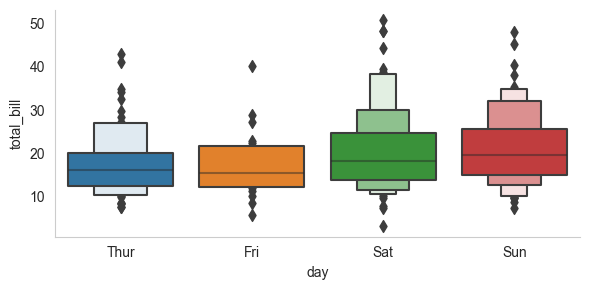

In [37]:
sns.set_style("whitegrid", {"grid.linestyle": "none"})
sns.set_palette("tab10")

sns.catplot(data=df, x="day", y="total_bill", kind="boxen", height=3, aspect=2)
plt.show()


### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

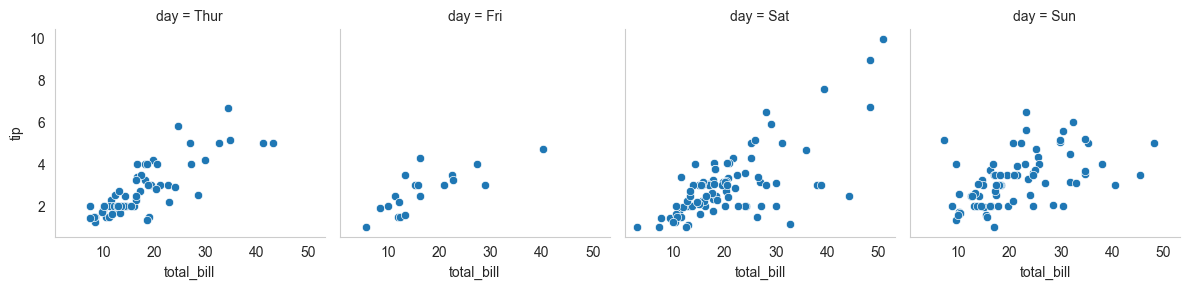

In [38]:
g = sns.FacetGrid(df, col="day")
g.map(sns.scatterplot, 'total_bill', 'tip')


❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

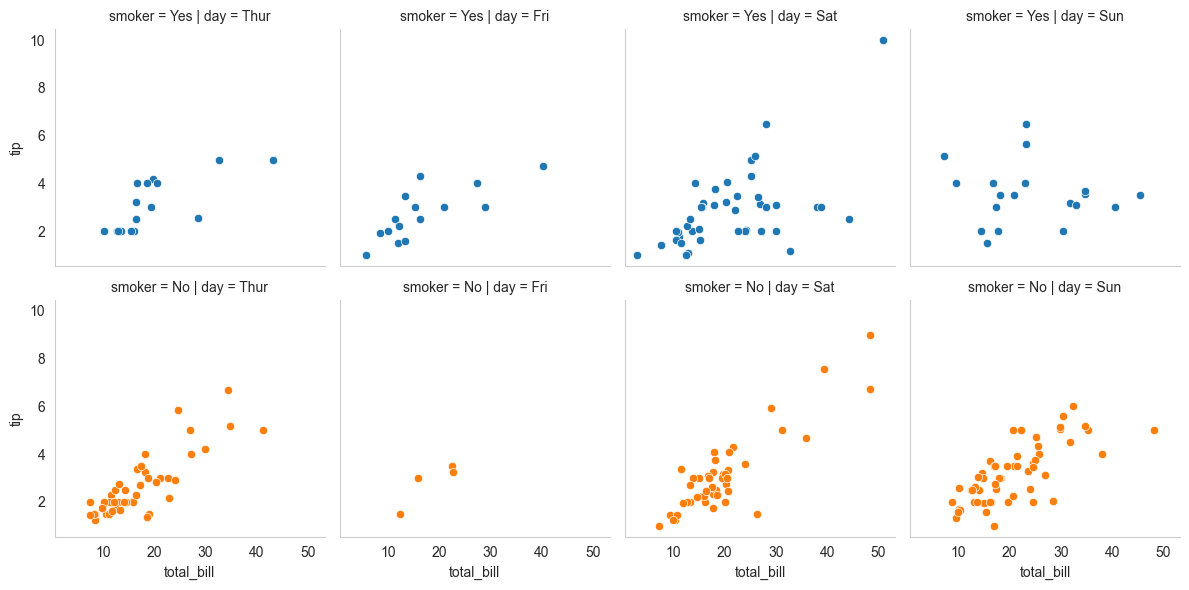

In [39]:
g = sns.FacetGrid(df, col="day", row="smoker", hue="smoker")
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.show()


## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

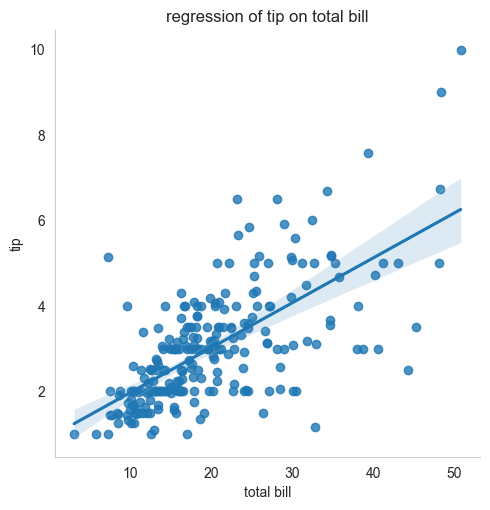

In [40]:
sns.lmplot(x='total_bill', y='tip', data=df)

plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('regression of tip on total bill')

plt.show()


❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

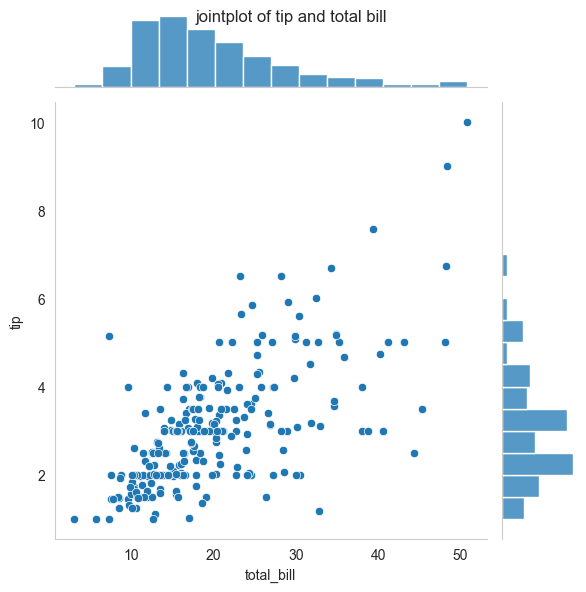

In [41]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='scatter')

plt.xlabel('total bill')
plt.ylabel('tip')
plt.suptitle('jointplot of tip and total bill')

plt.show()


❓ Let's now compute a simple linear regression curve using `sns.regplot()`

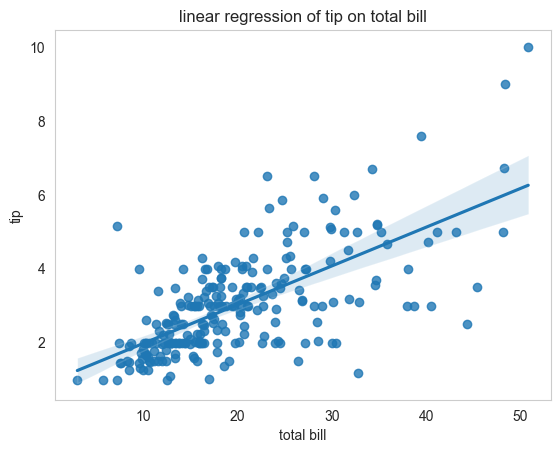

In [42]:
sns.regplot(x='total_bill', y='tip', data=df)

plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('linear regression of tip on total bill')

plt.show()


❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

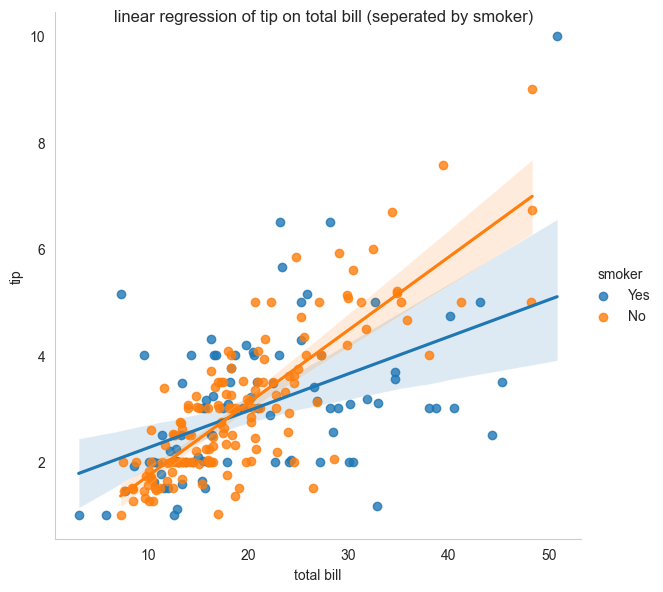

In [43]:
grid = sns.lmplot(x='total_bill', y='tip', data=df, hue='smoker', height=6)

grid.set_axis_labels('total bill', 'tip')
grid.fig.suptitle('linear regression of tip on total bill (seperated by smoker)')

plt.show()


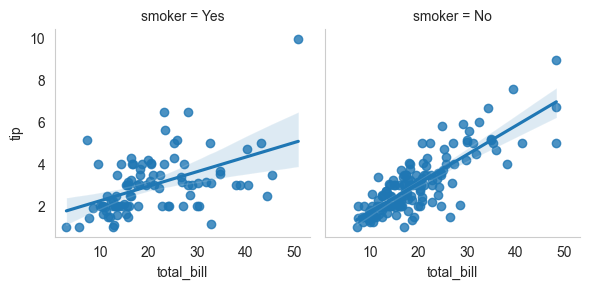

In [47]:
g = sns.FacetGrid(data=df, col="smoker")
g.map(sns.regplot, 'total_bill', 'tip')

plt.show()


## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

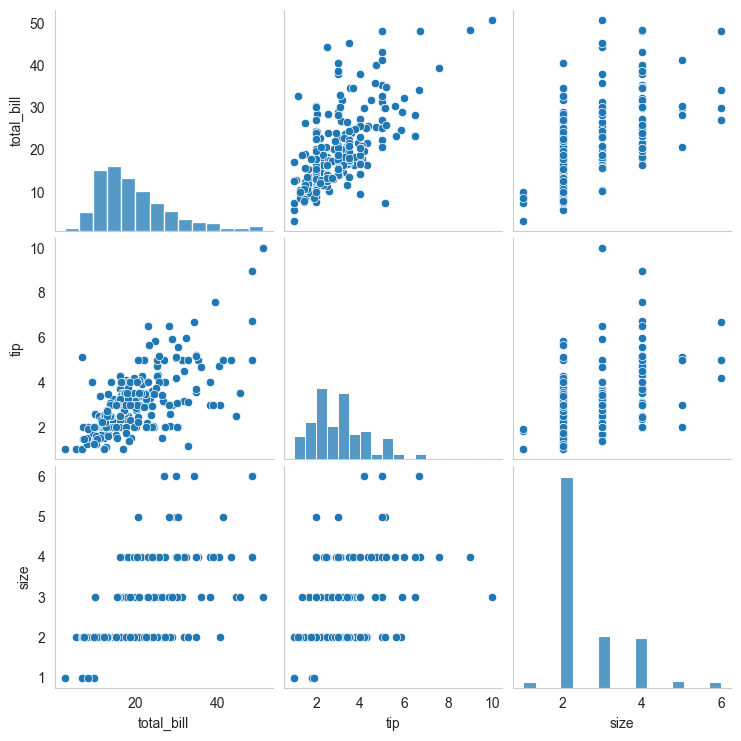

In [45]:
sns.pairplot(df)

plt.show()
